### import

In [ ]:
import pandas as pd

### 데이터 가져오기


In [ ]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')
root_path = "/content/drive/MyDrive/기계학습이해/"

# root_path = "C:/Users/user/Desktop/기계학습이해/"

# 데이터 읽어오기
df1 = pd.read_csv(root_path+"Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_1.csv", encoding = "cp949", engine='python')
df2 = pd.read_csv(root_path+"Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_2.csv", encoding = "cp949", engine='python')
df3 = pd.read_csv(root_path+"Dataset/(자동차보험) 고객별 사고 발생률 예측 모델링_3.csv", encoding = "cp949", engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 이상 없는 df의 column 확인
col = df2.columns

# 오류로 생성된 column 삭제
df1 = df1[col]


#df1의 파일상 null 행 삭제
null_idx = df1[df1["차종"].isnull()].index.tolist()
df1 = df1.drop(index = null_idx)


# 데이터 프레임 합치기
df = pd.concat([df1, df2, df3], ignore_index = True)
df

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO
0,A10,0.0,1.0,NaN,B,신차,기타,5.0,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0.0
1,A10,0.0,1.0,NaN,N,신차,기타,4.0,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0.0
2,A10,0.0,1.0,NaN,N,신차,기타,2.0,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3.0
3,A10,0.0,1.0,1.0,N,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0.0
4,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,A10,40.0,2.0,1.0,C,10년이상,중형,1.0,누구나(기본),8.0,미가입,미가입,7000K,0,0
267773,A10,40.0,2.0,1.0,C,5년이하,소형A,12.0,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0
267774,A10,40.0,2.0,1.0,C,10년이하,소형A,4.0,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1
267775,A10,40.0,2.0,1.0,C,5년이하,소형B,1.0,누구나(기본),7.0,5천만원이하,가입,미가입,0,0


In [ ]:
# 수치형인데 object인 column 형변환
df['YUHO'] = df['YUHO'].str.replace(',', '').astype(int)
df['SAGO'] = df['SAGO'].apply(lambda x: int(float(str(x).replace(',', '').split('.')[0])))
df['SAGO'] = df['SAGO'].replace(',', '').astype(int)

# column명 한글로 변환
df = df.rename(columns = {"ZINSRDAVL": "연령대", "ZIOSEXCD": "성별",
                        "ZDPRODSCD": "국산차량여부", "NCR": "직전3년간사고건수",
                        "ZCARPSGVL": "차량경과년수", "ZDRVLISCD___T": "운전자한정특별약관",
                        "ZENTCARCD": "가입경력코드", "ZCARISDAM": "차량가입금액",
                        "ZIMAGERVL": "영상기록장치특약가입", "YUHO": "유효대수",
                        "SAGO" : "사고건수"})

# 사용하지 않는 column drop
df = df.drop(columns = ['ZCPRLCLCD', 'ZDRVLISCD'])
df

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,유효대수,사고건수
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1,0
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,1,0
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1,3
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267772,40.0,2.0,1.0,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,7000K,0,0
267773,40.0,2.0,1.0,C,5년이하,소형A,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0
267774,40.0,2.0,1.0,C,10년이하,소형A,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1
267775,40.0,2.0,1.0,C,5년이하,소형B,누구나(기본),7.0,5천만원이하,가입,미가입,0,0


In [ ]:
# 사고율 / 사고유무 df 생성
df['사고유무'] = df.apply(lambda row: 0 if row['사고건수'] == 0 else 1, axis = 1)
df_yn = df.drop(columns = ['사고건수'])

In [ ]:
# x, y 분리
yn_X = df_yn.drop(columns = ["사고유무"])
yn_y = df_yn["사고유무"]

In [ ]:
yn_X

,연령대,성별,국산차량여부,직전3년간사고건수,차량경과년수,차종,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약가입,마일리지약정거리,유효대수
0,0.0,1.0,NaN,B,신차,기타,가족및형제자매한정,8.0,5천만원이하,가입,15000K,1
1,0.0,1.0,NaN,N,신차,기타,기명피보험자1인한정,8.0,미가입,미가입,15000K,1
2,0.0,1.0,NaN,N,신차,기타,가족한정(형제자매제외),5.0,5천만원이하,가입,미가입,1
3,0.0,1.0,1.0,N,10년이상,중형,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0
4,0.0,1.0,1.0,Z,5년이하,다목적2종,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0
...,...,...,...,...,...,...,...,...,...,...,...,...
267772,40.0,2.0,1.0,C,10년이상,중형,누구나(기본),8.0,미가입,미가입,7000K,0
267773,40.0,2.0,1.0,C,5년이하,소형A,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2
267774,40.0,2.0,1.0,C,10년이하,소형A,기명피보험자1인한정,8.0,미가입,미가입,미가입,6
267775,40.0,2.0,1.0,C,5년이하,소형B,누구나(기본),7.0,5천만원이하,가입,미가입,0


In [ ]:

# 결측치 제거
df_yn.isnull().sum()

연령대             0
성별              0
국산차량여부        193
직전3년간사고건수       0
차량경과년수          0
차종              0
운전자한정특별약관       0
가입경력코드          0
차량가입금액          0
영상기록장치특약가입      0
마일리지약정거리        0
유효대수            0
사고유무            0
dtype: int64

In [ ]:

df_yn = df_yn.dropna()
df_yn.isnull().sum()

연령대           0
성별            0
국산차량여부        0
직전3년간사고건수     0
차량경과년수        0
차종            0
운전자한정특별약관     0
가입경력코드        0
차량가입금액        0
영상기록장치특약가입    0
마일리지약정거리      0
유효대수          0
사고유무          0
dtype: int64

In [ ]:

# 데이터 type 변환

df_yn["연령대"] = df_yn["연령대"].astype(int)
df_yn["성별"] = df_yn["성별"].astype(int)
df_yn["국산차량여부"] = df_yn["국산차량여부"].astype(int)
df_yn["가입경력코드"] = df_yn["가입경력코드"].astype(int)


In [ ]:

# 모델에 넣기 위해 categorical 변수 Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

category = (df_yn.dtypes == object)
categorical_col = df_yn.columns[category].tolist()

for col_name in categorical_col:
    le = LabelEncoder()
    le = le.fit(df_yn[col_name])
    df_yn[col_name] = le.transform(df_yn[col_name])

In [ ]:

yn_X.shape

(267584, 12)

In [ ]:

from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, mean_squared_error, precision_score, recall_score
from sklearn.model_selection import KFold
import math


In [ ]:
# 로지스틱 회귀 함수
def SVC_classifier(X, y):

    # LogisticRegression 초기화
    model = SVC()

    # 오차를 저장할 DataFrame 생성
    accuracy = []
    err = []
    precision = []
    recall = []
    auc = []

    # 학습 100번 실행
    for i in range(100):

        # train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, stratify = y)

        # 모델 학습
        model.fit(X_train, y_train)

        # 예측
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1].reshape(-1,1)

        # 평가지표 저장
        accuracy.append(accuracy_score(y_test, y_pred))
        err.append((1 - accuracy_score(y_test, y_pred)))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        auc.append(roc_auc_score(y_test, y_proba))

        # print
        print(f"{i+1}번째 완료")

    result = pd.DataFrame(zip(accuracy, err, auc, precision, recall))
    result.columns = ['accuracy', 'error rate', 'AUC', 'precision', 'recall']

    return result


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# 오차를 저장할 DataFrame 생성


data_num_range = range(41000, 51000, 1000)
num_plots = len(data_num_range)


# all_accuracy = []

for i, data_num in enumerate(data_num_range):

    accuracy = []

    for j in range(30):

        # model = SVC(kernel = 'linear', C = 1)
        model = xgb.XGBClassifier()


        yn_X_temp = df_yn.sample(n=data_num)
        # x, y 분리
        yn_X = yn_X_temp.drop(columns = ["사고유무"])
        yn_y = yn_X_temp["사고유무"]


        X_train, X_test, y_train, y_test = train_test_split(yn_X, yn_y ,test_size = 0.2)


        # 모델 학습
        model.fit(X_train, y_train)

        # 예측
        y_pred = model.predict(X_test)

        # 평가지표 저장
        accuracy.append(accuracy_score(y_test, y_pred))

    print(data_num, " : ", np.median(accuracy))
    all_accuracy.append(accuracy)



41000  :  0.8214634146341463
42000  :  0.8213690476190476
43000  :  0.8226162790697675
44000  :  0.8216477272727273
45000  :  0.8227222222222222
46000  :  0.8220652173913043
47000  :  0.8238297872340425
48000  :  0.8232291666666667
49000  :  0.8221938775510205
50000  :  0.8222


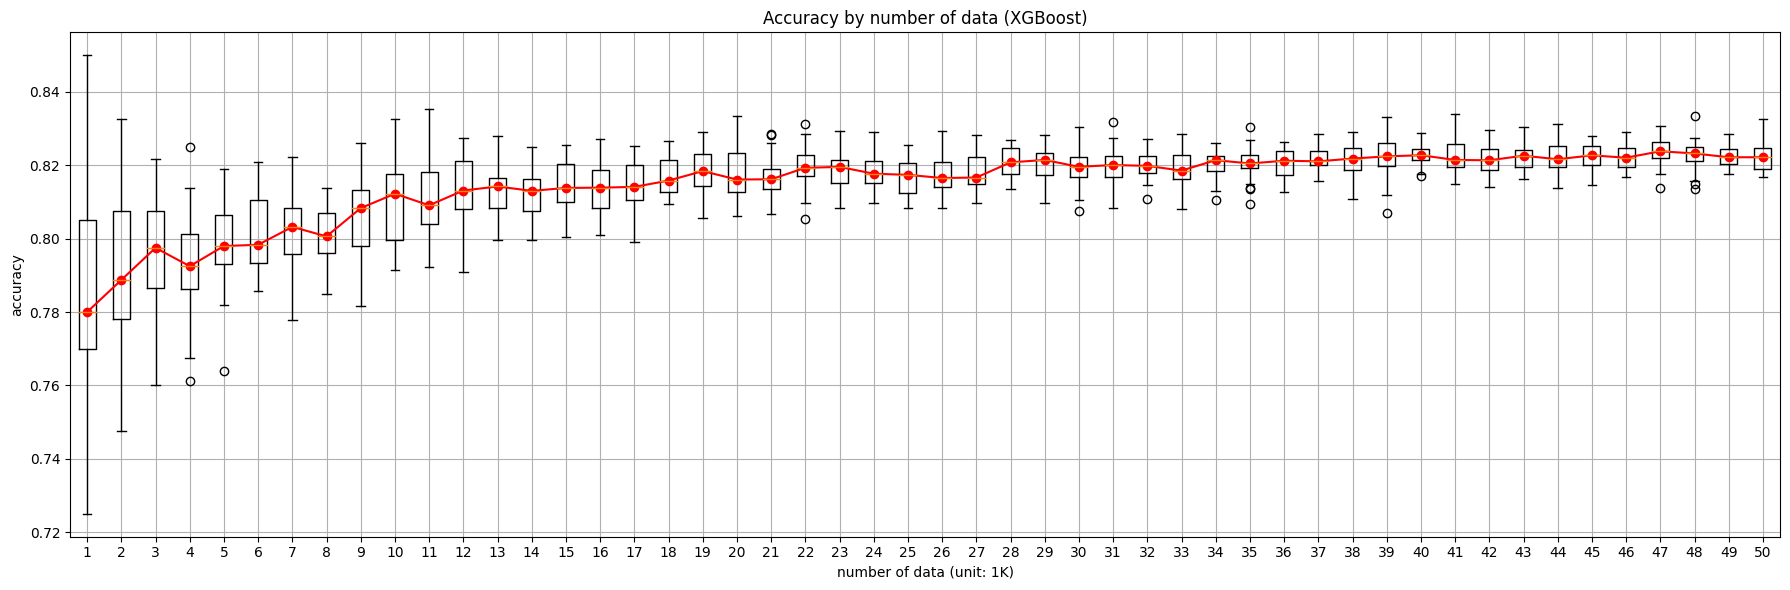

In [ ]:
import matplotlib.pyplot as plt

medians = [np.median(arr) for arr in all_accuracy]
# boxplot 그리기

plt.figure(figsize=(18, 6))

plt.boxplot(all_accuracy)

plt.plot(np.arange(1, len(medians) + 1), medians, marker='o', color='r', linestyle='-')

plt.grid(True)


# plt.xticks(np.arange(1, len(all_accuracy) + 1), data_num_range)  # 각 boxplot에 대한 이름 설정



# 그래프 제목과 축 레이블 설정
plt.title('Accuracy by number of data (XGBoost)')
plt.xlabel('number of data (unit: 1K)')
plt.ylabel('accuracy')

plt.tight_layout()
# 그래프 표시
plt.show()
